# <strong>R 데이터 전처리 및 통계분석
<br>
## <strong>1 데이터 전처리
### <strong>01 결측 데이터 정제
http://www.devtimes.com/194  (R 단축키)

In [1]:
df <- data.frame(sex   = c("M", "F", NA, "M", "F"),
                 score = c(5, 4, 3, 4, NA)); df
is.na(df)               # 결측치 확인 (boolean data.frame)
table(is.na(df))        # 결측치 빈도 출력 (value count)
table(is.na(df$sex))    # sex 결측치 빈도 출력
table(is.na(df$score))  # score 결측치 빈도 출력
mean(df$score)          # 평균 산출
sum(df$score)           # 합계 산출 (NA가 중간에 있으면 연산이 불가능 하다)

sex,score
M,5
F,4
NA,3
M,4
F,NA


sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE



FALSE  TRUE 
    8     2 


FALSE  TRUE 
    4     1 


FALSE  TRUE 
    4     1 

[1] NA

[1] NA

In [2]:
library(dplyr)                              # dplyr 패키지 로드
df %>% filter(is.na(score))                 # score가 NA인 데이터만 출력
df %>% filter(!is.na(score))                # score 결측치 제거


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



sex,score
F,NA


sex,score
M,5
F,4
NA,3
M,4


In [3]:
df_nomiss <- df %>% filter(!is.na(score))  # score 결측치 제거
mean(df_nomiss$score)                      # 결측치 제거 후 평균을 산출
sum(df_nomiss$score)                       # 결측치 제거 후 합계 산출

[1] 4

[1] 16

In [4]:
df_nomiss  <- df %>% 
              filter(!is.na(score) & !is.na(sex)) ; df_nomiss  # score, sex 컬럼의 결측치 제거 후 출력
df_nomiss2 <- na.omit(df) ; df_nomiss2                         # 모든 변수(컬럼)에 결측치 없는 데이터를 추출
mean(df$score, na.rm = T)                                      # 결측치 제외하고 평균 산출
sum(df$score, na.rm = T)                                       # 결측치 제외하고 합계 산출

sex,score
M,5
F,4
M,4


,sex,score
1,M,5
2,F,4
4,M,4


[1] 4

[1] 16

In [5]:
getwd()
setwd('/home/markbaum/Python/Source/R/data'); getwd()  # 작업 폴더의 변경
exam <- read.csv('csv_exam.csv')                       # CSV 파일 불러오기
exam[c(3, 8, 15), "math"] <- NA  ; head(exam,3)        # 3, 8, 15행 math에 NA를 할당

[1] "/home/markbaum/Python/Source/R"

[1] "/home/markbaum/Python/Source/R/data"

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,NA,86,78


In [6]:
exam %>% summarise(mean_math   = mean(math))               # math 평균 산출
exam %>% summarise(mean_math   = mean(math, na.rm = T))    # math 결측치 제외하고 평균 산출
exam %>% summarise(mean_math   = mean(math, na.rm = T),    # 평균 산출
                   sum_math    = sum(math, na.rm = T),     # 합계 산출
                   median_math = median(math, na.rm = T))  # 중앙값 산출
math_mid <- mean(exam$math, na.rm = T) ; math_mid          # 결측치 제거 후 math 평균을 산출

mean_math
NA


mean_math
55.23529


mean_math,sum_math,median_math
55.23529,939,50


[1] 55.23529

In [7]:
exam$math <- ifelse(is.na(exam$math), math_mid, exam$math)  # math컬럼의 NA를 55(평균값)로 대체
table(is.na(exam$math))                                     # 결측치 빈도표 생성
mean(exam$math)                                             # math 평균 산출 (NA제외한 평균과 동일한 결과를 출력)


FALSE 
   20 

[1] 55.23529

### <strong>02 이상치 데이터 정제
이상치 정제하기

In [8]:
outlier <- data.frame(sex   = c(1, 2, 1, 3, 2, 1),
                      score = c(5, 4, 3, 4, 2, 6)); head(outlier,3)
table(outlier$sex)
table(outlier$score)

sex,score
1,5
2,4
1,3



1 2 3 
3 2 1 


2 3 4 5 6 
1 1 2 1 1 

In [9]:
outlier$sex   <- ifelse(outlier$sex == 3, NA, outlier$sex);    head(outlier, 3) # sex가 3일 떄, NA 할당
outlier$score <- ifelse(outlier$score > 5, NA, outlier$score); head(outlier, 3) # score가 5보다 크면 NA 할당
outlier %>% 
      filter(!is.na(sex) & !is.na(score)) %>%
      group_by(sex) %>%
      summarise(mean_score = mean(score))

sex,score
1,5
2,4
1,3


sex,score
1,5
2,4
1,3


sex,mean_score
1,4
2,3


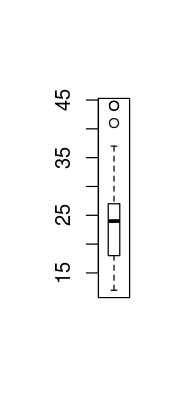

In [10]:
library(repr)                # ggplot 의 출력 크기를 정의
options(repr.plot.width = 1.5, repr.plot.height = 3.5)  
mpg <- as.data.frame(ggplot2::mpg)
boxplot(mpg$hwy)

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

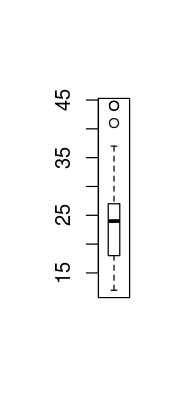

In [11]:
boxplot(mpg$hwy)$stats  # 상자 그림 통계치 출력

In [12]:
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy)  # 12~37 벗어나면 NA 할당
table(is.na(mpg$hwy))                                         # 결측치 확인
mpg %>% group_by(drv) %>% summarise(mean_hwy = mean(hwy, na.rm = T))


FALSE  TRUE 
  231     3 

drv,mean_hwy
4,19.17476
f,27.72816
r,21.00000


### <strong>03 데이터 정제 정리 및 요약
정제방법의 요약

In [13]:
# 1.결측치 정제
table(is.na(df$score))                                   # 결측치 확인
df_nomiss <- df %>% filter(!is.na(score))                # 결측치 제거
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex))  # 여러 변수 동시에 결측치 제거
mean(df$score, na.rm = T) 
exam %>% summarise(mean_math = mean(math, na.rm = T))    # 함수의 결측치 제외 후 평균출력


FALSE  TRUE 
    4     1 

[1] 4

mean_math
55.23529



1 2 
3 2 

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

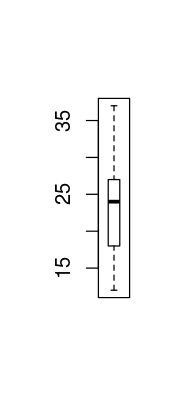

In [14]:
# 2.이상치 정제
table(outlier$sex)                                         # 이상치 확인
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex)  # 결측 처리
boxplot(mpg$hwy)$stats                                    # boxplot으로 극단치 기준 찾기

In [15]:
# 4분위로 구분 된 12, 37를 기준으로, 이를 넘어서는 극단치는 결측 처리 
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy) 
table(is.na(mpg$hwy))                    # 3개의 NA가 생성


FALSE  TRUE 
  231     3 

In [16]:
# NA를 제외한 나머지를 통해서 평균을 계산한다
mpg  %>% group_by(drv)  %>% summarise(mean_hwy = mean(hwy, na.rm = T))

drv,mean_hwy
4,19.17476
f,27.72816
r,21.00000


<br>
## <strong>2 통계적 분석을 이용한 가설 검정
### <strong>01 t-검정기법 1 ("컴펙트" 와 "SUV의 연비차이"를 비교분석)
<strong>t-test()</strong> : 두 집단의 유의한 차이를 <strong>p-value값</strong>으로 확인하는 통계적 기법

In [8]:
library(dplyr)
mpg      <- as.data.frame(ggplot2::mpg)
mpg_diff <- mpg %>% 
              select(class, cty) %>%                 # 출력 필드를 제한
              filter(class %in% c("compact", "suv")) # class 출력할 내용을 filter
head(mpg, 2)
head(mpg_diff, 2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


class,cty
compact,18
compact,21


In [9]:
table(mpg_diff$class)                                # Value Count
t.test(data = mpg_diff, cty ~ class, var.equal = T)

# 분산(산포도)이 동일함을 전제로, 두 집단의 평균을 t검정으로 확인 (p-value를 비교)
# 결과해석 : p-value가 0.05(유의수준) 미만이므로, 귀무가설이 기각되어 
# 실험자가 알고싶은 '두 집단의 차이'는 유의미 하다


compact     suv 
     47      62 


	Two Sample t-test

data:  cty by class
t = 11.917, df = 107, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.525180 7.730139
sample estimates:
mean in group compact     mean in group suv 
             20.12766              13.50000 


### <strong>02 t-검정기법 2 ("일반휘발류" 와 "고급휘발류"의 "연비차이"를 비교분석)
<strong>t-test()</strong>

In [11]:
mpg_diff2 <- mpg %>% 
              select(fl, cty) %>% 
              filter(fl %in% c("r", "p"))  # r:regular, p:premium
head(mpg_diff2, 2)

fl,cty
p,18
p,21


In [12]:
table(mpg_diff2$fl)
t.test(data = mpg_diff2, cty ~ fl, var.equal = T)
# 결과해석 : p-value 가 0.05(유의수준) 보다 크므로, '귀무가설'이 인용된다
# 따라서 대립가설인 '휘발류 간의 연비차이'는 없음이 통계적으로 검증되었다

# 참고 : 평균의 산술값은 차이가 나지만, '해석상의 해상도'로 인해서 
# p-value를 우선적으로 이해하여, "평균의 차이는 용인 가능한 수준"으로 결과를 해석한다


  p   r 
 52 168 


	Two Sample t-test

data:  cty by fl
t = 1.0662, df = 218, p-value = 0.2875
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5322946  1.7868733
sample estimates:
mean in group p mean in group r 
       17.36538        16.73810 


### <strong>03 상관분석 - 두 변수의 관계성 분석
<strong>두 연속변수간의 "상관계수 분석"으로 통계적 가설을 검정한다

In [18]:
# 1 미국의 실업률 데이터 분석
economics <- as.data.frame(ggplot2::economics)  
head(economics, 2)
cor.test(economics$unemploy, economics$pce)     # pce : personal consumption expenditures (소비지출 감소)
# 결과해석 : p-value 가 0.05 미만으로 귀무가설이 기각, 비교 분석 자료가 유의미 하다
# 상관계수가 0.614 으로, 실업률과 소비감소는 상관성이 있다

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945



	Pearson's product-moment correlation

data:  economics$unemploy and economics$pce
t = 18.605, df = 572, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5603164 0.6625460
sample estimates:
      cor 
0.6139997 


In [19]:
# 2 # 자동차 32종의 11개 속성 데이터 분석
head(mtcars, 2)            
car_cor <- cor(mtcars)        # 상관행렬 생성
head(round(car_cor, 2), 2)    # 소수점 셋째 자리에서 반올림해서 출력

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53


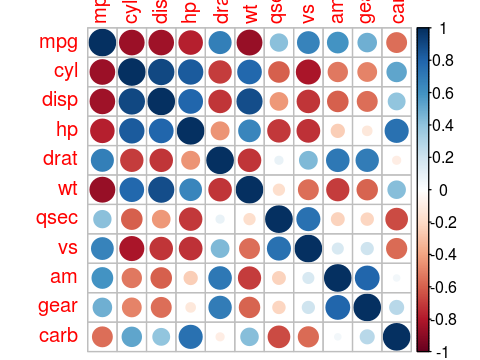

In [22]:
# Jupyter 출력 사이즈 설정 
# http://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

# install.packages("corrplot")
library(corrplot)
corrplot(car_cor)   # default : Heat Map이 크기별로 상관관계를 파악

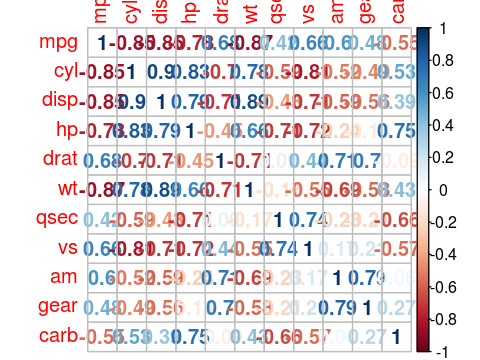

In [31]:
corrplot(car_cor, method = "number")  # 개별 숫자로 상관관계를 파악

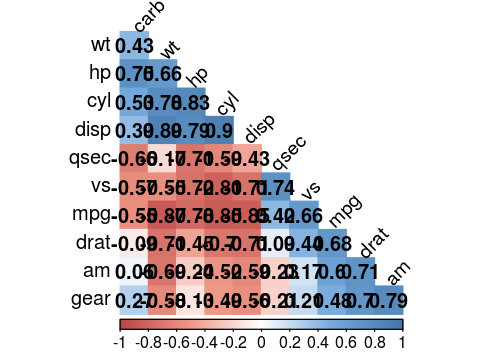

In [32]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA")) # 색상 목록을 지정
corrplot(car_cor,
         method      = "color",  # 색깔로 표현
         col         = col(200), # 색상 200개 선정
         type        = "lower",  # 왼쪽 아래 행렬만 표시
         order       = "hclust", # 유사한 상관계수끼리 군집화
         addCoef.col = "black",  # 상관계수 색깔
         tl.col      = "black",  # 변수명 색깔
         tl.srt      = 45,       # 변수명 45도 기울임
         diag        = F)        # 대각 행렬 제외